<h1>Assignment-1 |  Group - 14</h1>


<h2>Problem statement:</h2> 
<p>
The dataset consists of customers who churned from a bank.Based on independent features predict churn of customers.
</p>
<ul>
<li>Import the data from predicting-churn-for-bank-customers (Links to an external site.) (Links to an external site.) in python. (1 point)</li>
<li>Consider all columns as an independent variable and assign to variable X except the last column and consider the last column as dependent variable and assign to variable y. Remove columns which don’t help the problem statement. (1 point)</li>
<li>Encode all the categorical columns into numeric (1 point</li>
<li>Do Feature Scaling on Independent variables (2 points)</li>
<li>Perform Exploratory Data Analysis(1 point)</li>
<li>Split the data into train and test dataset(1 point)</li>
<li>Use sklearn library to train on train dataset on gaussian naive bayes and predict on test dataset  (3 points)</li>
<li>Compute the test accuracy and confusion matrix. (2 points)</li>
</ul>

<h2> Package Imports </h2>

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
import seaborn as sns; 

<h2> Reading the data </h2>
<p>As it can be seen that the shape of the file is (10000, 14). Which means the total rows are 10000 and columns are 14</p>

In [59]:
df = pd.read_csv('./Churn_Modelling.csv', delimiter=',')
print(df.shape)

(10000, 14)


<h2>Exploratory data analysis</h2>


<b>Check for columns and if it has any missing values . As it can be seen from the output below, there are no missing values</b>

In [60]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<b>Get unique count for each variable </b>

In [61]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

<p>As it can be seen from the output above that for all 10000 rows  <b>RowNumber</b> and <b>CustomerId</b> have unique values and will not represent any valuable information while creating a prediction model to predict whether the customer <b>Exited</b> or not. </p>

<p>Also <b>Surname</b> field might not be usefull as it has 2932 distinct values and may not directly correspond in predicting whether the customre <b>Exited</b> or not </p>

<p>Since <b>RowNumber</b> <b>CustomerId</b> are just the identifiers of a person we can eliminate them for sure from our dataset</p> 

<p> In case of Surname we will have to check and see whether there is any influence of keeping that feature or not </b>

In [62]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
#after dropping the columns we are left with following columns
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<b> Observations from the above output </b>

<ol>
<li>The <b>Balance</b> is for a given date which leaves a lot of questions:
    <ul>
    <li>
What date is it and of what relevance is this date? </li>
<li>Would it be possible to obtain balances over a period of time as opposed to a single date. ? </li>
<li>There are customers who have exited but still have a balance in their account. What would this mean?</li>
<li>Could they have exited from a product and not the bank?</li>
            </ul>
<li>What does being an active member mean? </li>
<li>Could it be better to provide transaction count both in terms of credits and debits to the account instead?</li>
<li>A break down to the products bought into by a customer could provide more information topping listing of product count</li>
</ol>


In [63]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

<p> The above output shows the data type of each field. It will help us understand whether we need to encode certain fields. As it can be seen that we mostly have have categorical variables and 5 continuous variables
 </p>

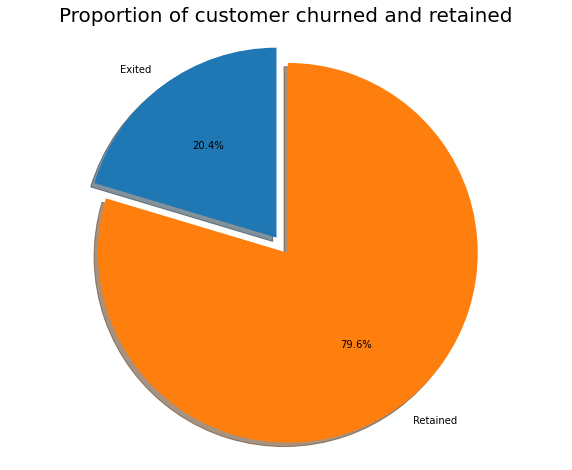

In [64]:
#EDA

labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

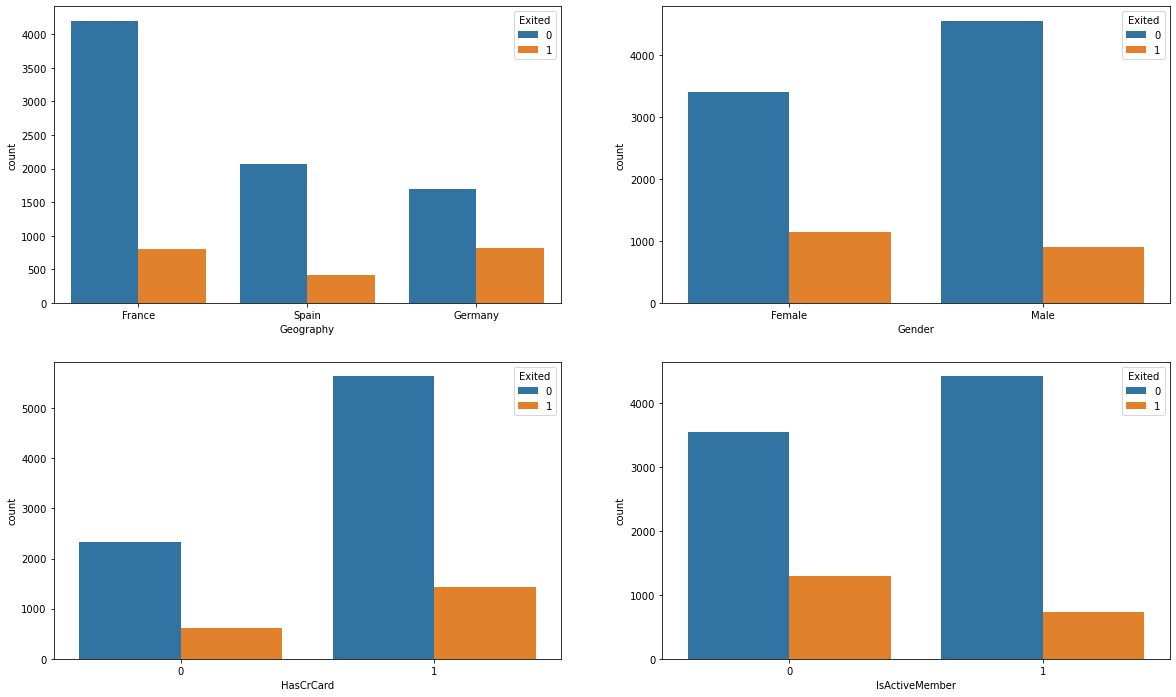

In [65]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

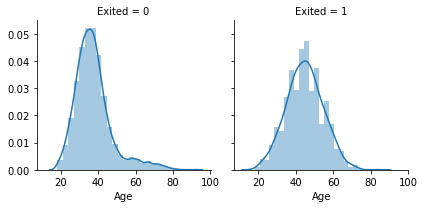

In [66]:
g = sns.FacetGrid(df, col = "Exited")
g.map(sns.distplot, "Age", bins = 25)
plt.show()


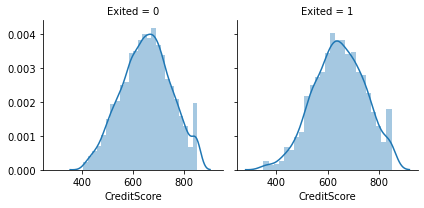

In [67]:
g = sns.FacetGrid(df, col = "Exited")
g.map(sns.distplot, "CreditScore", bins = 25)
plt.show()

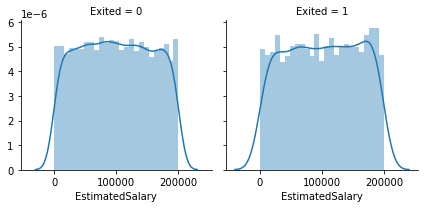

In [68]:
g = sns.FacetGrid(df, col = "Exited")
g.map(sns.distplot, "EstimatedSalary", bins = 25)
plt.show()

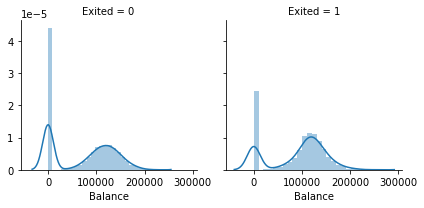

In [69]:
g = sns.FacetGrid(df, col = "Exited")
g.map(sns.distplot, "Balance", bins = 25)
plt.show()

In [70]:

df_geography_wise = df.groupby('Geography')['Exited'].value_counts().unstack().add_prefix('').rename_axis(None, axis =1).reset_index()
df_geography_wise.columns =['Geography', 'Not_Exited', 'Exited']
df_geography_wise.head()


,Geography,Not_Exited,Exited
0,France,4204,810
1,Germany,1695,814
2,Spain,2064,413


In [71]:
df_geography_wise["Total"] = df_geography_wise["Not_Exited"] + df_geography_wise["Exited"]
df_geography_wise["Percentage_Exited"] = (df_geography_wise["Exited"] / df_geography_wise["Total"]) * 100
df_geography_wise["Percentage_Not_Exited"] = (df_geography_wise["Not_Exited"] / df_geography_wise["Total"]) * 100
df_geography_wise.head()


,Geography,Not_Exited,Exited,Total,Percentage_Exited,Percentage_Not_Exited
0,France,4204,810,5014,16.154767,83.845233
1,Germany,1695,814,2509,32.443204,67.556796
2,Spain,2064,413,2477,16.673395,83.326605


<h3>Test Train Split</h3>

In [72]:
df_train = df.sample(frac=0.8,random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

def reset_df():
    df_train_x = df_train.drop(['Exited'], axis=1)
    df_train_y = df_train['Exited']
    df_test_x = df_test.drop(['Exited'], axis=1)
    df_test_y = df_test['Exited']
    return df_train_x,df_train_y,df_test_x ,df_test_y
    
df_train_x,df_train_y,df_test_x ,df_test_y = reset_df()


8000
2000


<h3>Transforming the variables</h3>

<ul>
    <li>
        <b>Scaling the numerical variables</b>
       </li>
        <li>
            <b>Numerical Encoding of the Categorical Variables</b>
    </li>
 <ul>

In [73]:
numerical_column = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
categorical_column = ["Geography","Gender", 'HasCrCard','IsActiveMember']

<b> Numerical Encoding of the Categorical Variables using LabelEncoder </b> : LabelEncoder() is used to do numerical encoding of categorical variables. While doing numerical encoding LabelEncoder assigns a number in increasing order in the order of occurence of a value in the dataset. 

In [74]:
labelencoder = LabelEncoder()
for cat_col in categorical_column:
    df_train_x[cat_col] = labelencoder.fit_transform(df_train_x[cat_col])
    

In [75]:
df_train_x.head(5)



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8159,461,2,0,25,6,0.00,2,1,1,15306.29
6332,619,0,0,35,4,90413.12,1,1,1,20555.21
8895,699,0,0,40,8,122038.34,1,1,0,102085.35
5351,558,1,1,41,2,124227.14,1,1,1,111184.67
4314,638,0,1,34,5,133501.36,1,0,1,155643.04


<p> Problem with LabelEncoder is that for colums like Geography it assigns 2 to Spain and 0 to France, 
due to which there could is a relation established like Spain>France (since 2>0) which in reality does not exist</p>
    
<b>LabelEncoder vs OneHotEncoder</b>
    
<p> To tackle such issues we have a OneHotEncoder() which does the one-hot encoding by expanding the column into multiple columns equal to no of possible values of a column. For eg. since the Geography column contains 3 distinct values, it will get expanded to 3 colums where each column will corresspond geographies of France, Spain and Germany respectively.  If the value of Geography for a row was Spain, in that case, column corresponding to Spain will have value of 1 while other Geography colums corresponding to Germany and France will have value 0. This technique is one-hot encoding </p>
    
<b>Feature Scaling of Numerical Variables</b>

Scikit comes with several inbuilt Scalers which can help us perfrom scaling of Numerical data. Feature scaling through standardization (or Z-score normalization) can be an important preprocessing step for many machine learning algorithms. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.

Some prominent scalers provided by sci-kit are 

<ul>
    <li><b>Standard Scaler</b>: provides scaling based on mean and standard deviation x_scaled = (x — u) / s </li>
    <li><b>MinMax Scaler</b>: transforms features by scaling each feature to a given range x_scaled = (x-min(x)) / (max(x)–min(x))</li>
    <li><b>MaxAbs Scaler</b>: provides scaling based on formula : x_scaled = x / max(abs(x))</li>
    <li><b>Robust Scaler</b>: If your data contains many outliers, scaling using the mean and standard deviation of the data is likely to not work very well. In these cases, you can use the RobustScaler. It removes the median and scales the data according to the quantile range</li>
  </ul> 
      
 For this assignment we will use <b>Standard Scaler</b> to scale numerical columns and a <b>OneHotEncoder</b> to Encode the categorical columns

 <h2> StandardScaler to scale numerical columns and a OneHotEncoder to Encode the categorical columns</h2>
 <p> We will use a columntransformer to do both of these operations togather </p>

In [76]:
clt = make_column_transformer((StandardScaler(), numerical_column),(OneHotEncoder(), categorical_column))
transformed_train_x = clt.fit_transform(df_train_x)
transformed_test_x = clt.fit_transform(df_test_x)

<h2>Use sklearn library to train on train dataset on gaussian naive bayes</h2>

In [77]:
gnb = GaussianNB()
gnb.fit(transformed_train_x, df_train_y)


GaussianNB()

<h2> Predictions on test dataset </h2>

<p> predict(test_x) will return an output array corresponding to prediction of each row in test dataset, where the value of prediction is 1 if the user Exited the bank and 0 if the user did not </p>

In [78]:
# Predict
y_pred = gnb.predict(transformed_test_x)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

<h2> Accuracy of Predictions on test dataset </h2> 

In [79]:
# Accuracy
acc = accuracy_score(df_test_y, y_pred)
acc

0.8215

<h2> Confusion Matrix of Predictions on test dataset </h2> 

[[1489  121]
 [ 236  154]]


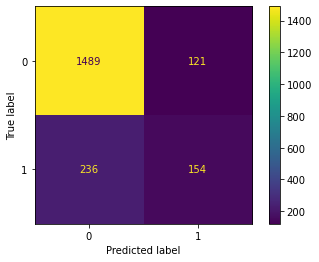

In [80]:
print(confusion_matrix(df_test_y, y_pred))

plot_confusion_matrix(gnb, transformed_test_x, df_test_y)